In [1]:
import pandas as pd

df = pd.read_csv("burnout_search_results.csv")

df["similarity_score"].describe()


count    289.000000
mean       0.315999
std        0.065424
min        0.250353
25%        0.269924
50%        0.293415
75%        0.335667
max        0.617340
Name: similarity_score, dtype: float64

<Axes: >

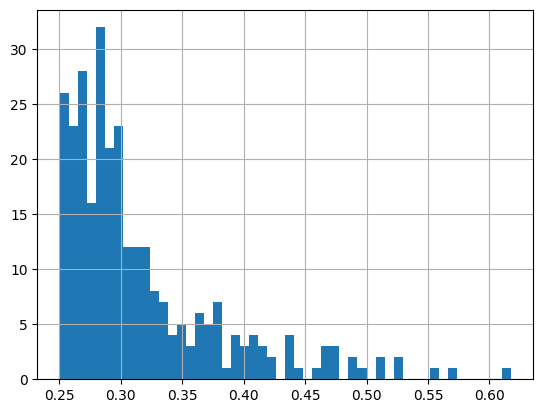

In [2]:

df["similarity_score"].hist(bins=50)

In [3]:
print(">=0.45:", (df["similarity_score"] >= 0.45).sum())
print("0.30–0.45:", df["similarity_score"].between(0.30, 0.45).sum())
print("<0.30:", (df["similarity_score"] < 0.30).sum())


>=0.45: 17
0.30–0.45: 107
<0.30: 165


In [12]:
df_high = df[df["similarity_score"] >= 0.45]


df_mid = df[
    df["similarity_score"].between(0.30, 0.45)
].sample(70, random_state=42)

df_low = df[
    df["similarity_score"] < 0.30
].sample(90, random_state=42)

df_label_pool = (
    pd.concat([df_high, df_mid, df_low])
      .sample(frac=1, random_state=42)
      .reset_index(drop=True)
)

df_label_pool = df_label_pool[["id", "text", "similarity_score"]]
df_label_pool["label"] = ""

df_label_pool.to_csv("manual_label_batch2.csv", index=False)
print(len(df_label_pool))


177


In [ ]:
# # First I want to check if prev label file and this file is same one? 
# # prev file: manual_label_batch1.xlsx
# # new file: manual_label_batch1.csv
# df_prev = pd.read_excel("manual_label_batch1.xlsx") 
# df_prev = df_prev[["id", "text", "similarity_score"]]
# df_new = pd.read_csv("manual_label_batch2.csv")
# df_new = df_new[["id", "text", "similarity_score"]]
# # # Check if the two dataframes are the same
# # if df_prev.equals(df_new):
# #     print("The two files are the same.")  
# # else:
# #     print("The two files are different.")

# # Find duplicates based on all columns
# # duplicates = pd.merge(df_prev, df_new, on=["id", "text", "similarity_score"], how='inner')
# # print(f"Found {len(duplicates)} duplicate rows")

# # Or just check by ID (if ID is unique identifier)
# duplicate_ids = set(df_prev['id']) & set(df_new['id'])
# print(f"Found {len(duplicate_ids)} duplicate IDs: {duplicate_ids}")


Found 177 duplicate IDs: {'1fahbfs', '1gprrtz', '1bdpv83', '1fingry', '196jwej', '1fixwaj', '1axdzp0', '1hk4neg', '1ayx0xi', '1cfnxvb', '1e7seiq', '1fokmwn', '1fijytk', '1b2vdch', '1dfdvee', '1cpv5kn', '1b301s2', '1hg5old', '1d4dyvd', '1hctd3z', '1eqwxll', '1hbxv4k', '1e6zv7b', '1gdqpjt', '194mzjq', '1aeiz0n', '1cc4iax', '1ax5xkd', '1hfjrdd', '1dinlql', '1g6kzes', '1bhq4is', '1bos6in', '1fdvsah', '1985qib', '1hovftt', '1e1xs0z', '1cg4mcz', '1h9izri', '1gj2ryy', '1c4m72w', '1dgwtln', '1ee15ny', '1gipr35', '18zkb5o', '1d8fpxt', '1cdiyqz', '1e8fwci', '1evyk4q', '1ct13t1', '1dzgaah', '1eqpykj', '1gq4p0x', '1e8n8gr', '1h8wyo4', '1dnleqp', '197jyhj', '1ds856w', '1b2vu5r', '1cjoyj4', '1b0hkw9', '1b4zzz0', '1ej3oew', '1gp3hjo', '1c1u1na', '1enunyh', '19fnjk4', '1gqj2y1', '1b0qxch', '1d8sd21', '1df0o6n', '1hpsyyq', '1g9ipw6', '1ea7d3r', '1fqxn7a', '1gduly2', '1dsa9fl', '1d8lmw3', '1ehp6ik', '1bpdsrj', '1ga6hmb', '1ajw61e', '1cd4xcq', '1b9mg72', '1fwi2zz', '1g49xt4', '1gy9k2y', '1c42eyx', '1aw47

In [ ]:
#we are gonna new approach, we will label the remianing rows from burnout_search_results.csv, and 
# then merge with the old labeled data, hopefully to increase the number of labeled data, true labels, 
#  for training the model.

#first we will filter the remaining rows from burnout_search_results.csv, 
# then we will label them and merge with the old labeled data.
import pandas as pd
# Load the original search results
df_original = pd.read_csv("burnout_search_results.csv")
# Load the previously labeled data
df_labeled_old = pd.read_excel("manual_label_batch1.xlsx")

duplicate_ids = set(df_original['id']) & set(df_labeled_old['id'])
print(f"Found {len(duplicate_ids)} duplicate IDs: {duplicate_ids}")

# Filter out the already labeled rows
df_remaining = df_original[~df_original['id'].isin(duplicate_ids)]
print("Remaining rows to label:", df_remaining.shape)
# Now we can create  a new file excluding the 177 duplicates with empty label column for manual labeling
df_remaining = df_remaining[["id", "text", "similarity_score"]]
df_remaining["label"] = ""
df_remaining.to_csv("manual_label_batch2.csv", index=False)
print("File 'manual_label_batch2.csv' created with remaining rows to label.")
# Now we can create  a new file excluding the 177 duplicates with empty label column for manual labeling



Found 177 duplicate IDs: {'1fahbfs', '1gprrtz', '1bdpv83', '1fingry', '196jwej', '1fixwaj', '1axdzp0', '1hk4neg', '1ayx0xi', '1cfnxvb', '1e7seiq', '1fokmwn', '1fijytk', '1b2vdch', '1dfdvee', '1cpv5kn', '1b301s2', '1hg5old', '1d4dyvd', '1hctd3z', '1eqwxll', '1hbxv4k', '1e6zv7b', '1gdqpjt', '194mzjq', '1aeiz0n', '1cc4iax', '1ax5xkd', '1hfjrdd', '1dinlql', '1g6kzes', '1bhq4is', '1bos6in', '1fdvsah', '1985qib', '1hovftt', '1e1xs0z', '1cg4mcz', '1h9izri', '1gj2ryy', '1c4m72w', '1dgwtln', '1ee15ny', '1gipr35', '18zkb5o', '1d8fpxt', '1cdiyqz', '1e8fwci', '1evyk4q', '1ct13t1', '1dzgaah', '1eqpykj', '1gq4p0x', '1e8n8gr', '1h8wyo4', '1dnleqp', '197jyhj', '1ds856w', '1b2vu5r', '1cjoyj4', '1b0hkw9', '1b4zzz0', '1ej3oew', '1gp3hjo', '1c1u1na', '1enunyh', '19fnjk4', '1gqj2y1', '1b0qxch', '1d8sd21', '1df0o6n', '1hpsyyq', '1g9ipw6', '1ea7d3r', '1fqxn7a', '1gduly2', '1dsa9fl', '1d8lmw3', '1ehp6ik', '1bpdsrj', '1ga6hmb', '1ajw61e', '1cd4xcq', '1b9mg72', '1fwi2zz', '1g49xt4', '1gy9k2y', '1c42eyx', '1aw47

In [ ]:
#the labeling for label = 1 (about burnout) and label = 0 (not about burnout) was very low so what Im gonna do is 
# add label = 1 for the rows into the prev file to inclease the number of labeled data

# go to file manula_label_batc2, the file is in number format change it ito csv or xlsx
# then filter label=1 and add those rows into manual_label_batch1 file
import pandas as pd

# Step 1: Read the manual_label_batch2 file (assuming it's in Excel format)
df_batch2 = pd.read_csv("manual_label_batch2.csv") 

if 'label' in df_batch2.columns:
    df_filtered = df_batch2[df_batch2['label'] == 1].copy()
    print(f"\n Filtered {len(df_filtered)} rows with label=1")




 Filtered 11 rows with label=1


In [35]:
df_batch1 = pd.read_csv("test_data_with_labels_BINARY.csv")
print(f" Read manual_label_batch1.csv ({len(df_batch1)} rows)")

df_batch2 = pd.read_csv("fewshot_examples.csv")

print(f" Read manual_label_batch2.csv ({len(df_batch2)} rows)")

 Read manual_label_batch1.csv (167 rows)
 Read manual_label_batch2.csv (10 rows)


In [36]:
# Step 5: Check for duplicates
print("\n--- Checking for duplicates ---")
if 'id' in df_filtered.columns and 'id' in df_batch1.columns:
    duplicate_ids = set(df_filtered['id']) & set(df_batch1['id'])
    if duplicate_ids:
        print(f" Found {len(duplicate_ids)} duplicate IDs")
        print(f"Duplicate IDs: {list(duplicate_ids)[:10]}...")
        df_filtered = df_filtered[~df_filtered['id'].isin(df_batch1['id'])]
        print(f" Removed duplicates, {len(df_filtered)} new rows to add")
    else:
        print(" No duplicate IDs found")
else:
    print(" No 'id' column for duplicate checking")


--- Checking for duplicates ---
 No duplicate IDs found


In [37]:
# Step 6: Merge the data
df_combined = pd.concat([df_batch1, df_batch2, df_filtered], ignore_index=True)
print(f"\n--- Merging ---")
print(f"Batch 1: {len(df_batch1)} rows")
print(f"Batch 2: {len(df_batch2)} rows")
print(f"Filtered Batch 2: {len(df_filtered)} rows")
print(f"Combined: {len(df_combined)} rows")




--- Merging ---
Batch 1: 167 rows
Batch 2: 10 rows
Filtered Batch 2: 11 rows
Combined: 188 rows


In [38]:
# Step 7: Save the combined file
# df_combined.to_excel("manual_label_batch1_updated.xlsx", index=False)
df_combined.to_csv("manual_label_batch1_updated.csv", index=False)
print(f"\n Saved combined data:")
print(f"  - manual_label_batch1_updated.csv")


 Saved combined data:
  - manual_label_batch1_updated.csv
